Group members:
1. Tanveer Mahmood Hasan 1725413
2. Jaki Fayek Alvi Rahman 172185
3. Liu Yufei 1722279
4. Md Raisul Islam 1725501

In [9]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import json
import re
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener 
import os
os.chdir('F:/SEM 05/NATURAL LANGUAGE PROCESSING/ASSIGNMENTS/Assignment 3')

consumer_key = "6MkAqmNAU5FFTTSpmGfDBl7V3"
consumer_secret = "RT3x4PcLRm8Wc5hsS8FqVLc9GOTcPpbO439QRYeie0y9Xzz6pI"
access_token = "1138300675090083840-CWSTqjawByEi4la28auxf365tbGV2q"
access_secret= "PHH5MZDzetZDBTNDe5NY5FODxUM70j8JtjKYMdKrjLokP"



auth= OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
api=tweepy.API(auth)


file= open('flood_raw.dat','a')


class Mylistener(StreamListener):
    def __init__(self, api=None):
        super(StreamListener,self).__init__()
        self.num_tweet = 0
        
    def on_data(self,data):
        try:
            with open('flood_filtered.dat','a') as f:
                tweet=json.loads(data)
                
                if tweet ['lang']=="en":
                    file.write(data)
                    file.write('\n')
                  
                if tweet['lang']=='en' :
                    if self.num_tweet<2000:
                        print(json.dumps(tweet["text"],indent=4))
                        f.write(tweet["text"])
                        f.write("\n")
                        self.num_tweets += 1
                        
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True    
                    
def on_error(self,status):
        print(status)
        return True
def on_status(self,status):
    if status.retweeted_status=='true':
        return
    print(status)
      
mytwitter_stream = Stream(auth,Mylistener())
mytwitter_stream.filter(track=['flood', '#flood','#floodmalaysia','#prayforpahang', '#flood2021'])
file.close()
print("done")                  


"RT @PhilWMagness: USA covid strategy:\n\n1. Lockdown\n2. Flood nursing homes with covid patients\n3. Attain highest death rate in the world\n4.\u2026"
Error on_data: 'Mylistener' object has no attribute 'num_tweets'
"RT @EsotericExposal: It is time for the public to break free from the flood of propaganda and lies that the Mainstream Media utilizes in it\u2026"
Error on_data: 'Mylistener' object has no attribute 'num_tweets'
"RT @welovemewgulf: The provinces in South Border of Thailand are currently affected by flood and landslide due to the recent storm. Attache\u2026"
Error on_data: 'Mylistener' object has no attribute 'num_tweets'
"RT @ajol_llama: Periodically, i get a flood of ridiculous messages. I dont understand why people wanna keep blaming me for things totally u\u2026"
Error on_data: 'Mylistener' object has no attribute 'num_tweets'
"RT @ancientorigins: Startling Similarity between Hindu Flood Legend of Manu and the Biblical Account of Noah https://t.co/zKCHrom7br https:\u20

KeyboardInterrupt: 

In [10]:
posts = api.user_timeline(screen_name="myUNICEF", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

Show the 5 recent tweets:

1) There are so many ways you can help children in need &amp; at the same time celebrate a milestone: Welcoming a baby, celebrating a birthday, tying the knot or reaching retirement.

Send a UNICEF #TributeGift today &amp; make a difference in children’s lives &gt;&gt; https://t.co/OC9RZukFNP https://t.co/oi1FxDqrvG

2) Get this candle set now! Keep a look out for our friendly fundraisers in Kuala Lumpur, Johor &amp; Penang. You can be a #FriendOfUNICEF with a donation as low as RM2/day or more.

#KeepItLit #Reimagine #ForEveryChild https://t.co/N98iebnF5h

3) Let’s #KeepItLit and #Reimagine HOPE #ForEveryChild.

Join us by lighting the UNICEF Blue Candle, post your new year's resolution along with the hashtags #Reimagine #ForEveryChild and #KeepItLit

FriendOfUNICEF https://t.co/z4FbGvLnGc

4) What would a #Climate-friendly, #ChildUtopia look like?
5 teens from Asia set about building their perfect, green world in Minecraft to send a message on what they thi

,Tweets
0,There are so many ways you can help children i...
1,Get this candle set now! Keep a look out for o...
2,Let’s #KeepItLit and #Reimagine HOPE #ForEvery...
3,"What would a #Climate-friendly, #ChildUtopia l..."
4,Contd...\n\nMore tips to keep safe during a fl...


In [11]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

df.info



<bound method DataFrame.info of                                                Tweets  Subjectivity  Polarity
0   There are so many ways you can help children i...      0.312500  0.250000
1   Get this candle set now! Keep a look out for o...      0.433333  0.291667
2   Let’s KeepItLit and Reimagine HOPE ForEveryChi...      0.277273  0.068182
3   What would a Climate-friendly, ChildUtopia loo...      0.600000  0.433333
4   Contd...\n\nMore tips to keep safe during a fl...      0.500000  0.541667
..                                                ...           ...       ...
95  Recently, we teamed up w , to survey young peo...      0.325000  0.078125
96  Want to join in on our WorldChildrensDay celeb...      0.000000  0.000000
97  We all need a healthy planet - especially for ...      0.625000  0.300000
98  “I want to be a doctor or a teacher… or a clot...      0.700000  0.400000
99  😎 Dapatkan template untuk mesej anda di   . (I...      0.000000  0.000000

[100 rows x 3 columns]>

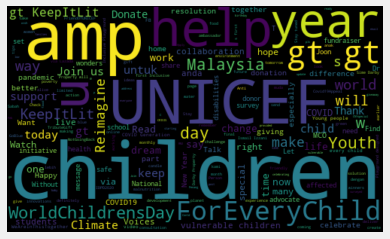

In [12]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [13]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    elif score>0:
        if score >=0.4:
            return "Booster"
        else:
            return "positive"

df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,There are so many ways you can help children i...,0.312500,0.250000,positive
1,Get this candle set now! Keep a look out for o...,0.433333,0.291667,positive
2,Let’s KeepItLit and Reimagine HOPE ForEveryChi...,0.277273,0.068182,positive
3,"What would a Climate-friendly, ChildUtopia loo...",0.600000,0.433333,Booster
4,Contd...\n\nMore tips to keep safe during a fl...,0.500000,0.541667,Booster
...,...,...,...,...
95,"Recently, we teamed up w , to survey young peo...",0.325000,0.078125,positive
96,Want to join in on our WorldChildrensDay celeb...,0.000000,0.000000,Neutral
97,We all need a healthy planet - especially for ...,0.625000,0.300000,positive
98,“I want to be a doctor or a teacher… or a clot...,0.700000,0.400000,Booster


Printing positive tweets:

Printing negative tweets:

1) This month, donate to UNICEF via Lazada &amp; receive sets of limited edition red packets.*

DONATE via LAZADA : 

foreverychildHOPE CNYspecial Covid19Appeal

*T&amp;C Apply

2) ForEveryChild, a green and blue planet. As part of our initiative to go green, our Tax Exemption Receipts for monthly donors will be changed to electronic format starting from this year. 

3) Clean water and soap do wonders for protecting our life and health, especially for those vulnerable children. 

YOU make WONDERS happen! Thank you for being with us this entire year.
 
Donate now. Help us keep making wonders for children &gt;&gt; 

KeepItLit 

4) Extreme poverty - they are struggling to survive, develop and thrive on less than RM8 a day (~cost of a plate of Hainanese Chicken Rice in KL). You can help change this situation.

Donate today &gt;&gt; 

ForEveryChildOpportunities 

5) From movement control to lifestyle changes, children have been just as a

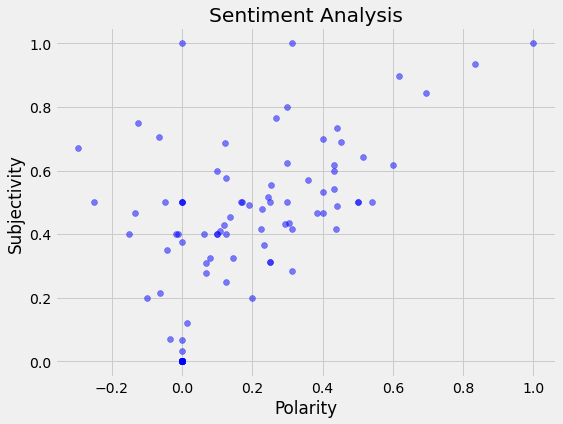

In [18]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue',alpha=0.5) 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()


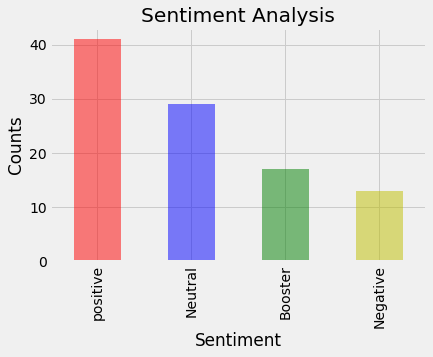

In [17]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

# Show the value counts
df['Analysis'].value_counts()

# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar',alpha=0.5,color=['r','b','g','y'])
plt.show() 